# DAS Cable

### Author: Haipeng Li
### Email: haipeng@sep.stanford.edu 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from GenericCable import GenericCable

In [3]:
font_size = 12
params = {
    'image.cmap': 'seismic',
    'axes.grid': False,
    'savefig.dpi': 300,
    'font.size': font_size,
    'axes.labelsize': font_size,
    'axes.titlesize': font_size,
    'legend.fontsize': font_size,
    'xtick.labelsize': font_size,
    'ytick.labelsize': font_size
}
plt.rcParams.update(params)

### Set cable and analysis the cable

In [4]:
traj = np.array([[100., 0, 100.0], [200., 0, 600.0], [500., 0, 1000.0], [1500., 0, 1000.0]])

# set large length for better plotting
chann_len = 150.0
chann_num = 130
gauge_len = 10.0

cable = GenericCable(traj, chann_len, chann_num, gauge_len)

Last channel length must be between 5.0 and 2004.9019513592784 m, it is 19505.0 m
Change the channel number to 13 to make sure the last channel ends at the end of the cable


In [5]:
cable

DAS Cable Information: 
  Cable total length: 2009.90 m 
  Channel coverage: 5.00 - 1955.00 m 
  Channel interval: 150.00 m 
  Channel number: 13 
  Gauge length: 10.00 m 
  Max channel length error: 13.1962 m 
  Max  gauge  length error: 0.0000 m 


In [6]:
cable.dot_product_test()

********************************************** 
Dot-product test: 
  Input waveform comp: vel, DAS comp: strain_rate 
  lhs = 8.39266224e-01 
  rhs = 8.39266224e-01 
  absolute error = 3.33066907e-16 
  relative error = 3.96854893e-16 

********************************************** 
Dot-product test: 
  Input waveform comp: vel, DAS comp: strain 
  lhs = -7.66935243e-02 
  rhs = -7.66935243e-02 
  absolute error = 1.52655666e-16 
  relative error = 1.99046357e-15 

********************************************** 
Dot-product test: 
  Input waveform comp: disp, DAS comp: strain_rate 
  lhs = 2.20528286e+02 
  rhs = 2.20528286e+02 
  absolute error = 5.96855898e-13 
  relative error = 2.70648227e-15 

********************************************** 
Dot-product test: 
  Input waveform comp: disp, DAS comp: strain 
  lhs = -5.75628674e-01 
  rhs = -5.75628674e-01 
  absolute error = 1.11022302e-15 
  relative error = 1.92871390e-15 



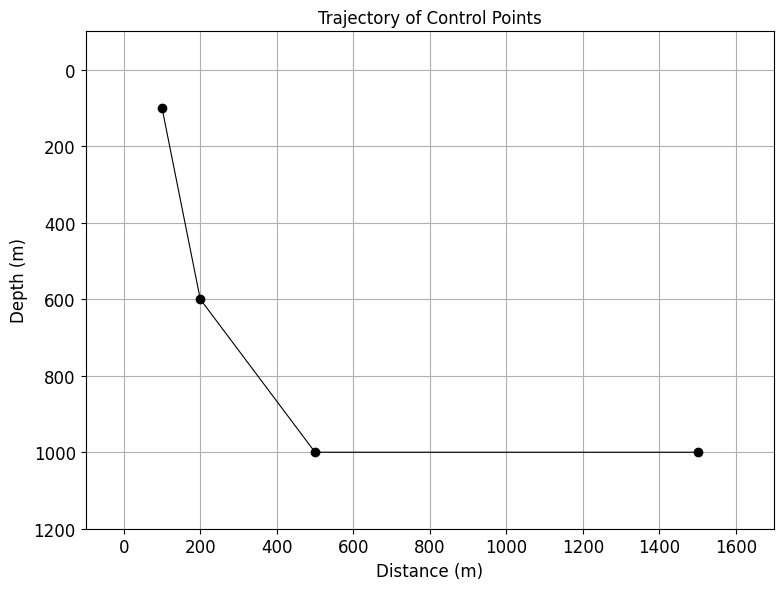

In [7]:
cable.plot_traj()

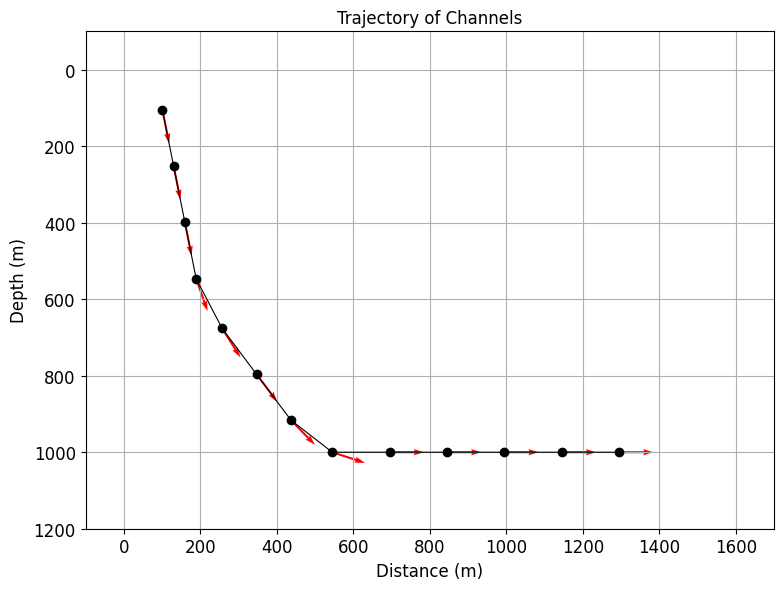

In [8]:
cable.plot_channel(show_tangent=True)

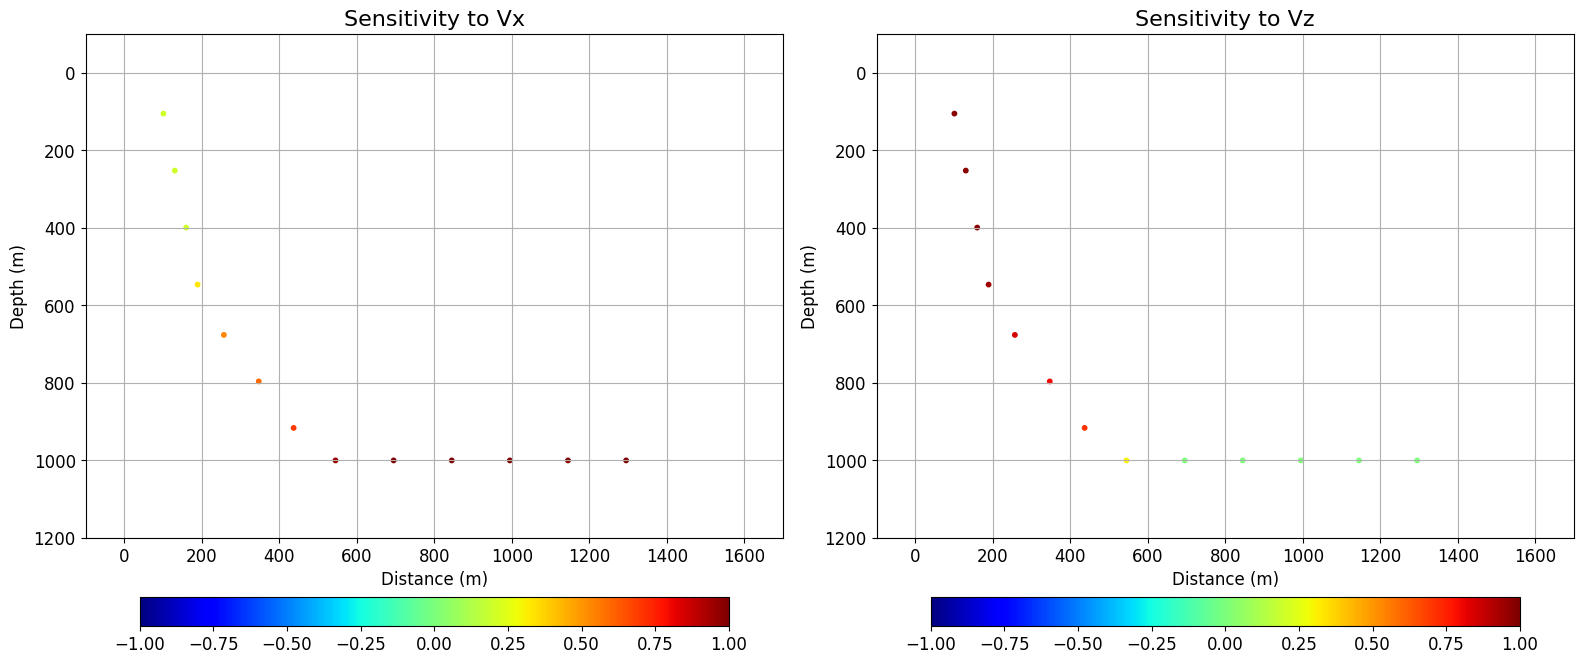

In [9]:
cable.plot_sensitivity()

### How to use in forward modeling and inversion

In [20]:
traj = np.array([[100., 0, 100.0], [200., 0, 600.0], [500., 0, 1000.0], [1500., 0, 1000.0]])

# set normal length that could be used in real life
chann_len = 10.0
chann_num = 199
gauge_len = 10.0

cable = GenericCable(traj, chann_len, chann_num, gauge_len)

In [21]:
cable

DAS Cable Information: 
  Cable total length: 2009.90 m 
  Channel coverage: 5.00 - 1995.00 m 
  Channel interval: 10.00 m 
  Channel number: 199 
  Gauge length: 10.00 m 
  Max channel length error: 1.0552 m 
  Max  gauge  length error: 0.0386 m 


In [22]:
cable.dot_product_test()

********************************************** 
Dot-product test: 
  Input waveform comp: vel, DAS comp: strain_rate 
  lhs = -2.37294728e-02 
  rhs = -2.37294728e-02 
  absolute error = 1.49880108e-15 
  relative error = 6.31620051e-14 

********************************************** 
Dot-product test: 
  Input waveform comp: vel, DAS comp: strain 
  lhs = -3.00978490e-02 
  rhs = -3.00978490e-02 
  absolute error = 7.28583860e-17 
  relative error = 2.42071738e-15 

********************************************** 
Dot-product test: 
  Input waveform comp: disp, DAS comp: strain_rate 
  lhs = -4.01737300e+03 
  rhs = -4.01737300e+03 
  absolute error = 9.09494702e-13 
  relative error = 2.26390405e-16 

********************************************** 
Dot-product test: 
  Input waveform comp: disp, DAS comp: strain 
  lhs = 1.12931622e+00 
  rhs = 1.12931622e+00 
  absolute error = 1.77635684e-15 
  relative error = 1.57294902e-15 



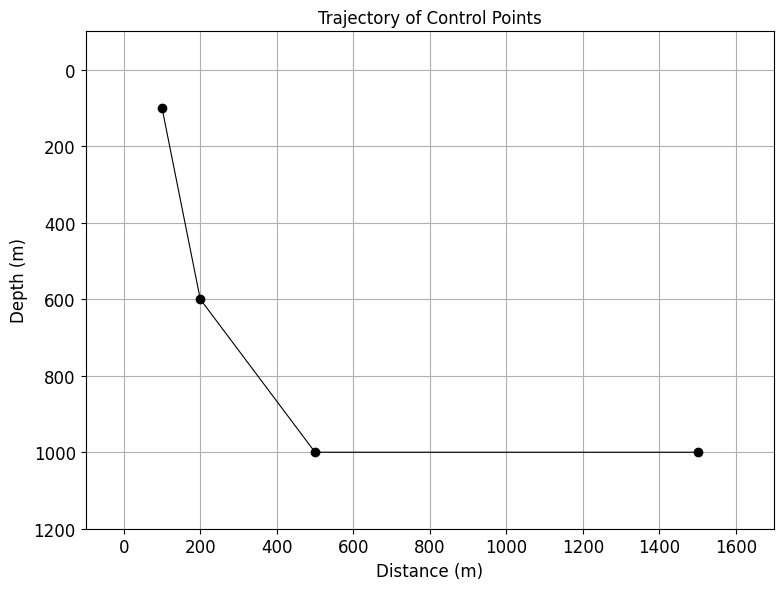

In [23]:
cable.plot_traj()

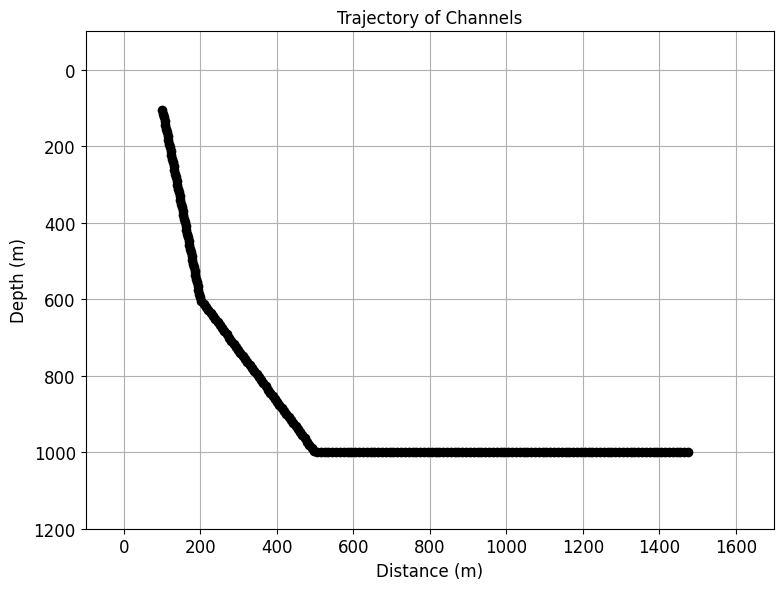

In [24]:
cable.plot_channel()

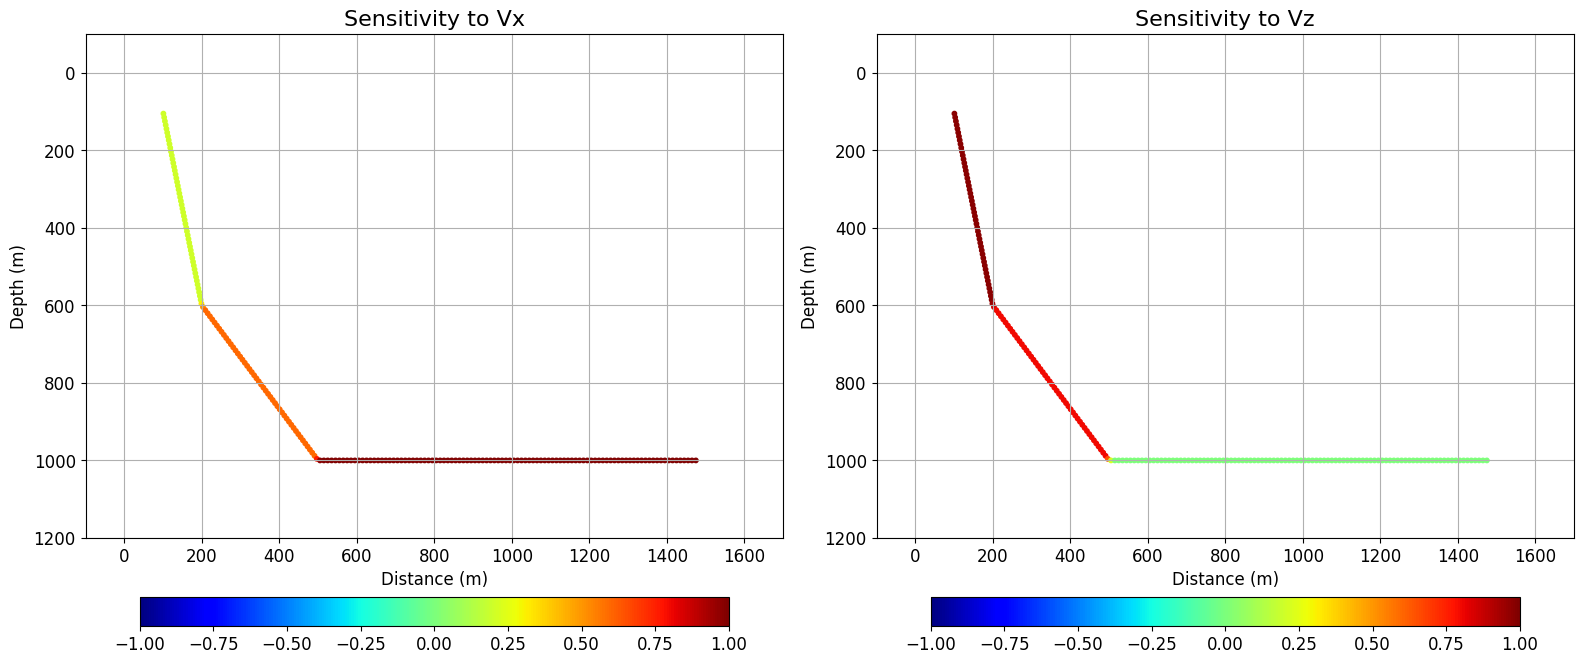

In [25]:
cable.plot_sensitivity()

### Obtain the receiver location for exsisting propagator

In [27]:
rec_loc = cable.get_rec_loc_unique()

In [29]:
rec_loc.shape

(200, 3)

### Run your propagator with above 3-component geophone locations

In [35]:
# load the 3C geophone waveforms here
nt = 201
dt = 0.002
nrec = rec_loc.shape[0]
geo_data = np.random.rand(3, nrec, nt)

### DAS data forward modeling

In [38]:
das_data = cable.forward(geo_data, m_comp = 'vel', d_comp = 'strain_rate', dt = dt)

In [39]:
das_data.shape

(199, 201)

### DAS data adjoint modeling for inversion

In [40]:
# let's say we compare the syn and obs DAS data and have some residual 
das_res = np.random.rand(199, nt)

In [41]:
# run the adjoint operator to get the residual in the geophone data space
geo_res = cable.adjoint(das_res, m_comp = 'vel', d_comp = 'strain_rate', dt = dt)

In [42]:
geo_res.shape

(3, 200, 201)

### Then, you can provide the geophone residual to your FWI code based on the geophone data ( particle velocity component in this case)